In [2]:
import warnings
warnings.simplefilter('ignore')


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('./StudentsPerformance.csv.xls')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


{0: "associate's degree", 1: "bachelor's degree", 2: 'high school', 3: "master's degree", 4: 'some college', 5: 'some high school'}


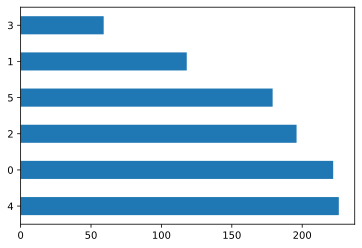

In [5]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(df['parental level of education']))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [6]:
categorical_columns = df.columns[df.dtypes == 'object'].union(['gender'])
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


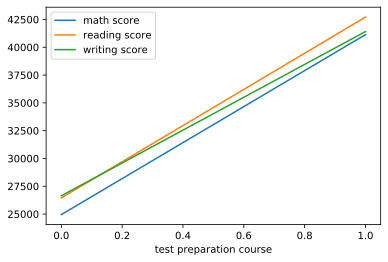

In [7]:
sales_df = df[['test preparation course'] + ['math score'] + ['reading score'] + ['writing score']]
sales_df.groupby('test preparation course').sum().plot()

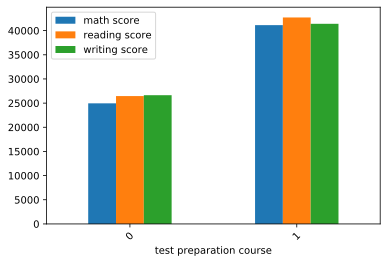

In [8]:
sales_df.groupby('test preparation course').sum().plot(kind='bar', rot=45)

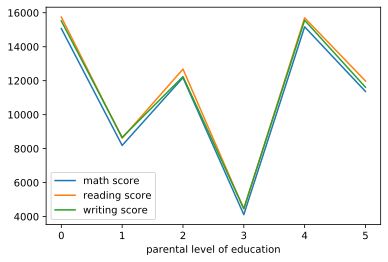

In [9]:
sales_df = df[['parental level of education'] + ['math score'] + ['reading score'] + ['writing score']]
sales_df.groupby('parental level of education').sum().plot()

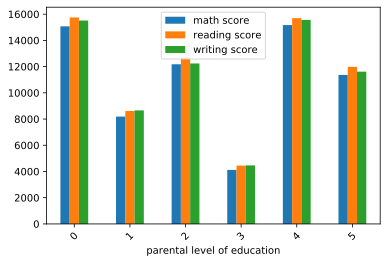

In [10]:
sales_df.groupby('parental level of education').sum().plot(kind='bar', rot=45)

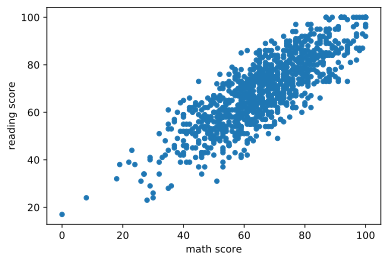

In [11]:
df.plot.scatter(x='math score', y='reading score')

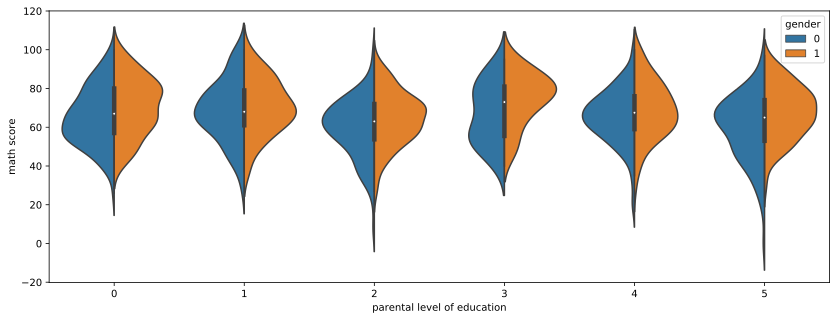

In [23]:
fig = plt.figure(figsize= (14,5))
sns.violinplot(y="math score", x="parental level of education",hue = 'gender', split = True,data=df)

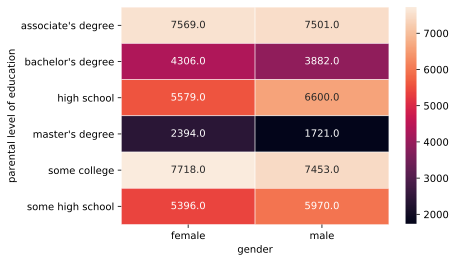

In [4]:
platform_genre_sales = df.pivot_table(
                        index='parental level of education', 
                        columns='gender', 
                        values='math score', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

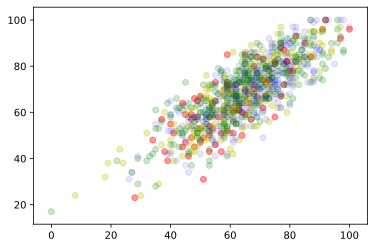

In [8]:
x1 = df[df['race/ethnicity'] == 'group A']['math score']
x2 = df[df['race/ethnicity'] == 'group B']['math score']
x3 = df[df['race/ethnicity'] == 'group C']['math score']
x4 = df[df['race/ethnicity'] == 'group D']['math score']
y1 = df[df['race/ethnicity'] == 'group A']['reading score']
y2 = df[df['race/ethnicity'] == 'group B']['reading score']
y3 = df[df['race/ethnicity'] == 'group C']['reading score']
y4 = df[df['race/ethnicity'] == 'group D']['reading score']
# ключ цвета из {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}:
plt.scatter(x1, y1, c = 'r', alpha=.4)
plt.scatter(x2, y2, c = 'y', alpha=.3)
plt.scatter(x3, y3, c = 'g', alpha=.2)
plt.scatter(x4, y4, c = 'b', alpha=.1)